# Explore here

In [65]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Problema:

Calcúlar válor de prima, para cada uno de los clientes de la aseguradora según datos físiologicos

In [67]:
# Clasificación de variables y valores faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
def separar_columnas(df):
    # Listas vacías para almacenar los nombres de las columnas categóricas y numéricas
    categoricas = []
    numericas = []
    
    # Iterar por las columnas del DataFrame
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numericas.append(col)
        else:
            categoricas.append(col)
    
    return print(f'Categóricas: {categoricas}\nNúmericas: {numericas}')

separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


In [71]:
# Verificación de filas duplicadas

print(f'Filas Duplicadas: {df.duplicated().sum()}')

# Eliminación de filas duplicadas

df = df.drop_duplicates()
print(f'Filas Duplicadas tras eliminación: {df.duplicated().sum()}')

df

Filas Duplicadas: 0
Filas Duplicadas tras eliminación: 0


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


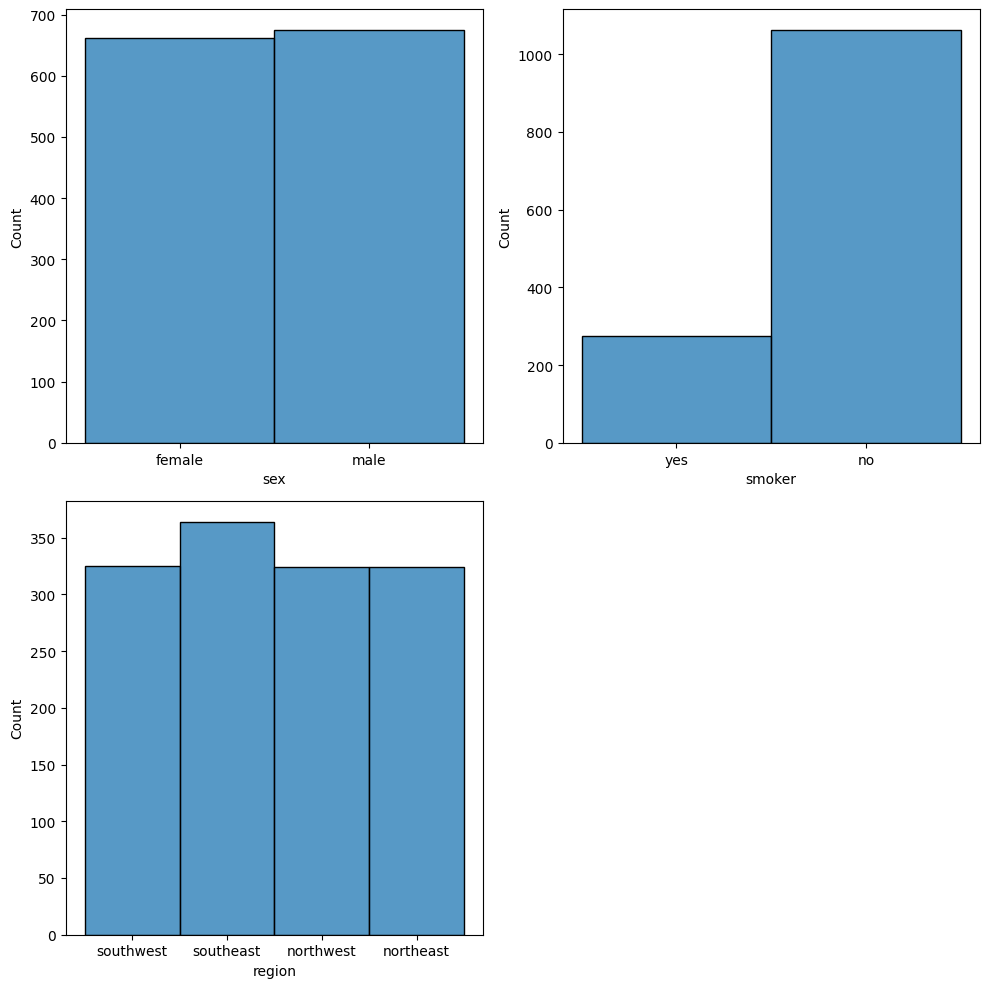

In [70]:
# Análisis Univariante 
    #Categorico

fig, axis = plt.subplots(2,2,figsize=(10,10))

#histogramas
sns.histplot(ax= axis[0,0],data=df,x='sex')
sns.histplot(ax= axis[0,1],data=df,x='smoker')
sns.histplot(ax= axis[1,0],data=df,x='region')


fig.delaxes(axis[1,1])
plt.tight_layout()
plt.show()

In [19]:
separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


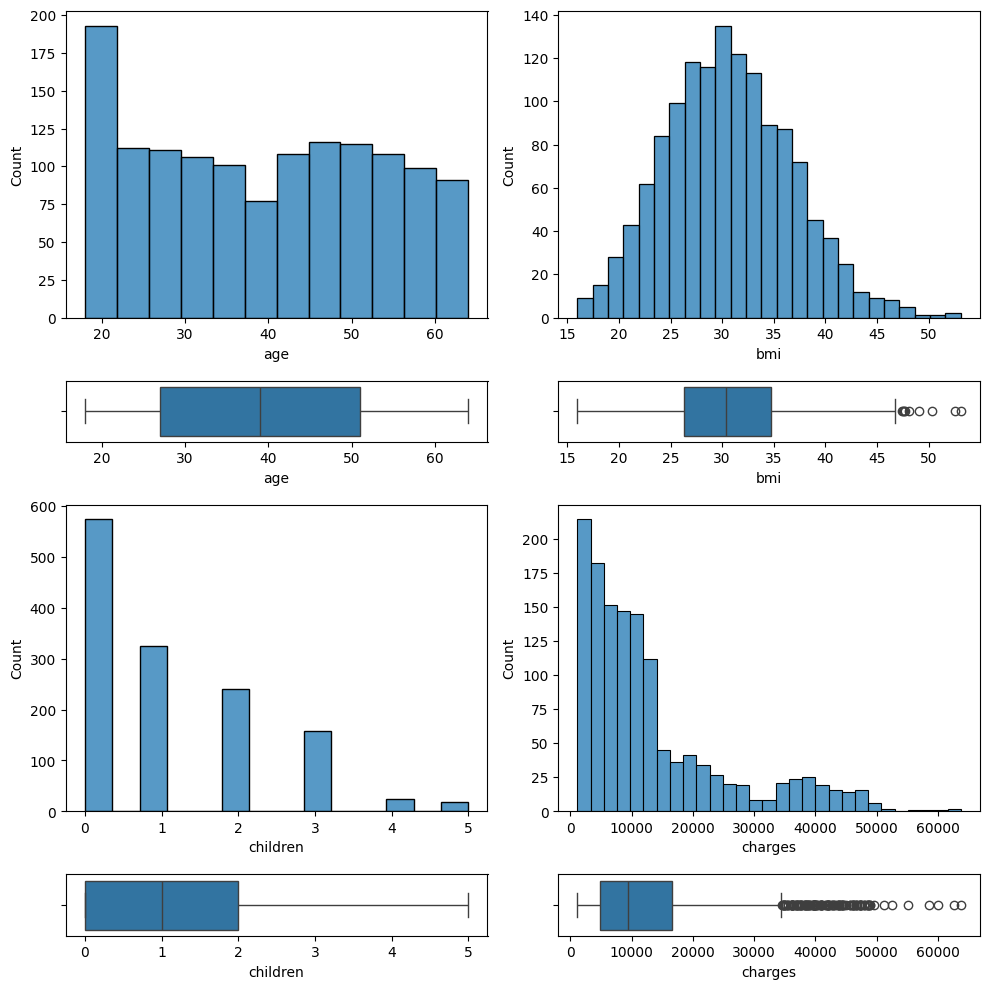

In [73]:
    # Númerico

fig, axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={"height_ratios":[5,1,5,1]}) 

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='bmi')
sns.boxplot(ax=axis[1,1],data=df,x='bmi')

sns.histplot(ax=axis[2,0],data=df,x='children')
sns.boxplot(ax=axis[3,0],data=df,x='children')

sns.histplot(ax=axis[2,1],data=df,x='charges')
sns.boxplot(ax=axis[3,1],data=df,x='charges')

plt.tight_layout()
plt.show()
            

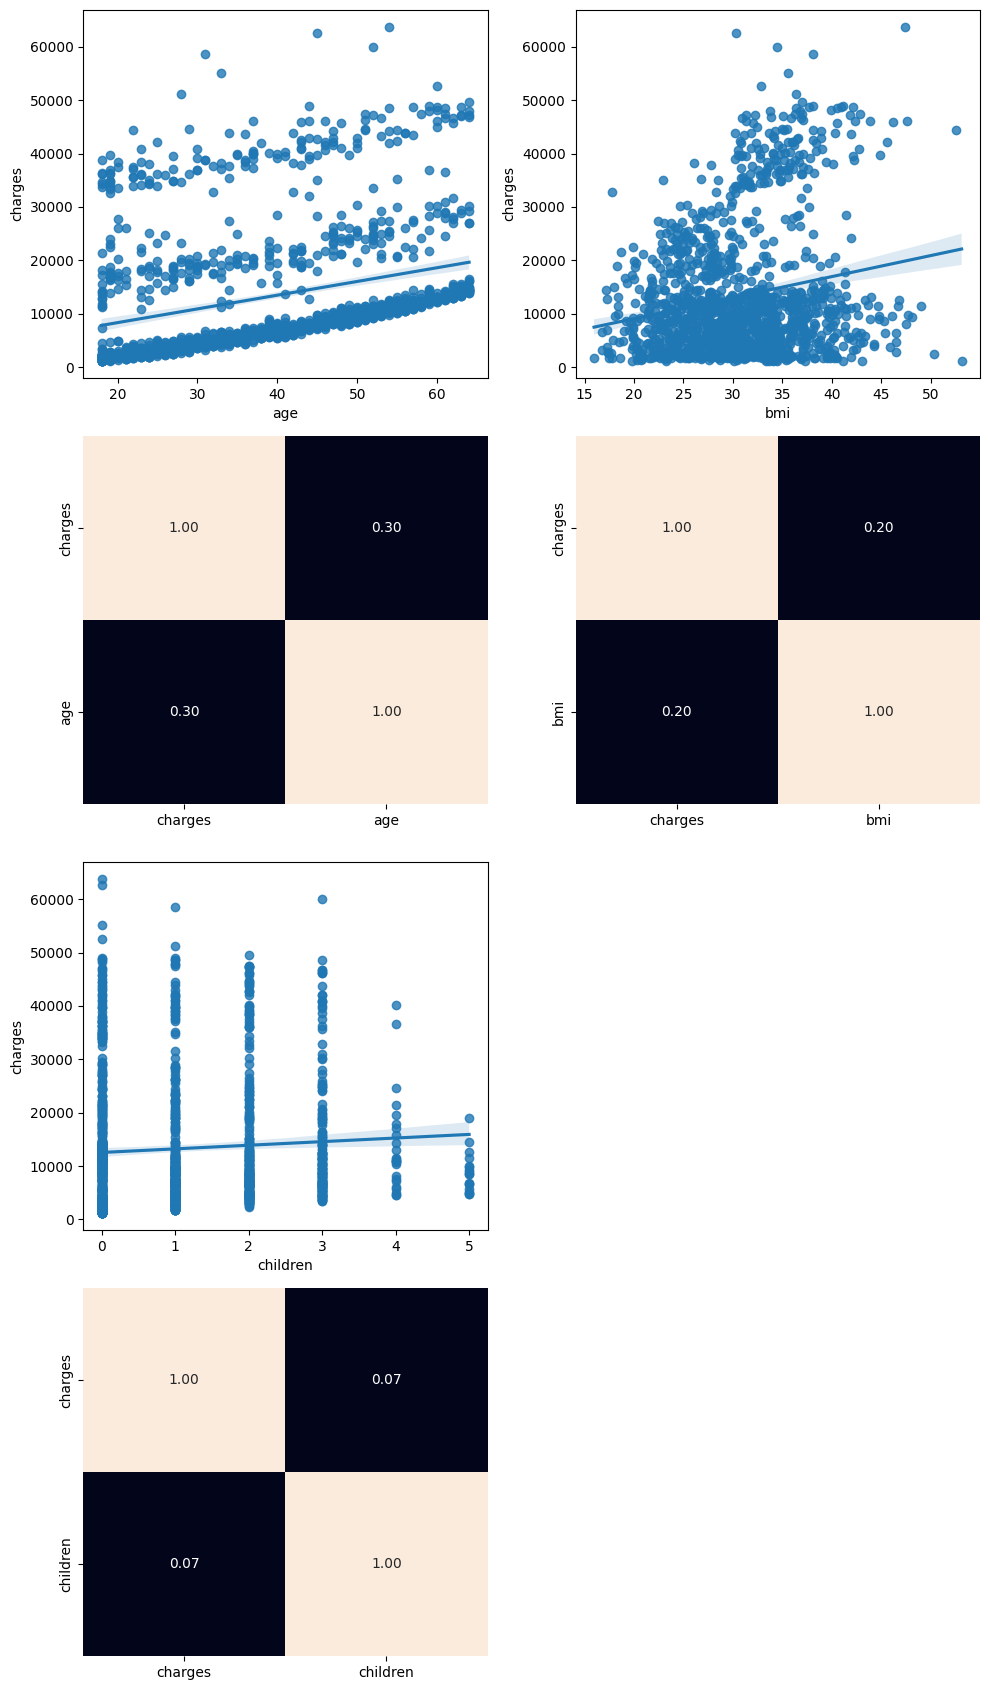

In [75]:
# Análisis Multivariante
    # Númerico - númerico

fig, axis = plt.subplots(4,2,figsize=(10,17))

sns.regplot(ax=axis[0,0], data=df, x="age", y="charges")
sns.heatmap(df[['charges','age']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="bmi", y="charges")
sns.heatmap(df[['charges','bmi']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="children", y="charges")
sns.heatmap(df[['charges','children']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

fig.delaxes(axis[3,1])
fig.delaxes(axis[2,1])
plt.tight_layout()
plt.show()

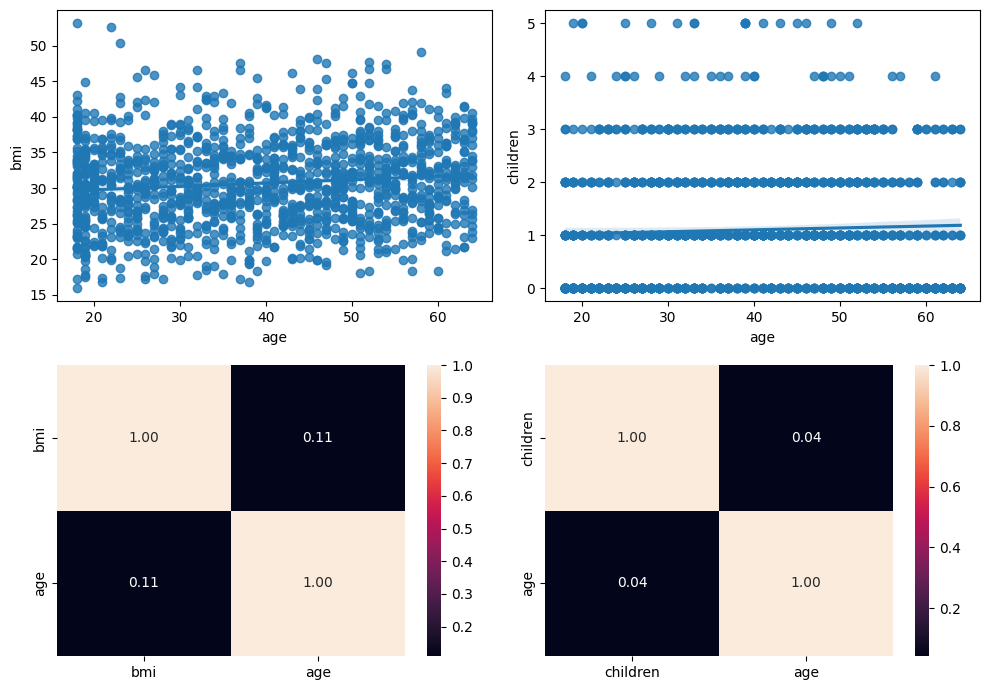

In [76]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0,0], data = df, x = "age", y = "bmi")
sns.heatmap(df[["bmi", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0])

sns.regplot(ax = axis[0,1], data = df, x = "age", y = "children")
sns.heatmap(df[["children", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])


plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

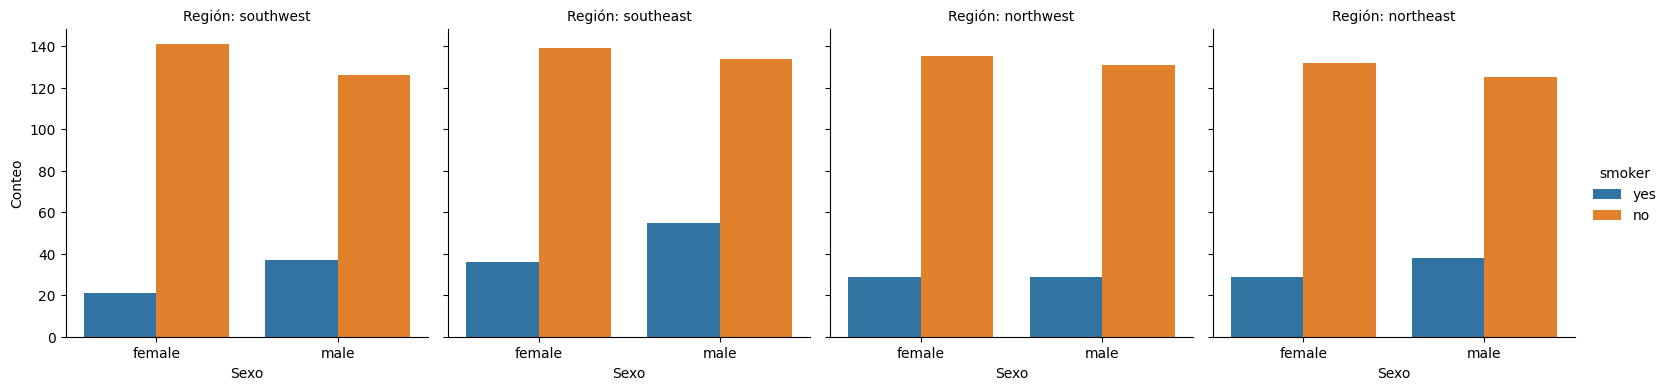

In [77]:
    #Análisi Categórico - Categórico

plt.figure(figsize=(10, 6))

g = sns.catplot(data=df, x='sex', hue='smoker', col='region', kind='count', height=4, aspect=1)
g.set_axis_labels('Sexo', 'Conteo')
g.set_titles(col_template='Región: {col_name}')
plt.show()



In [79]:
    # Factorización de variables cátegoricas

df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'] = pd.factorize(df['region'])[0]


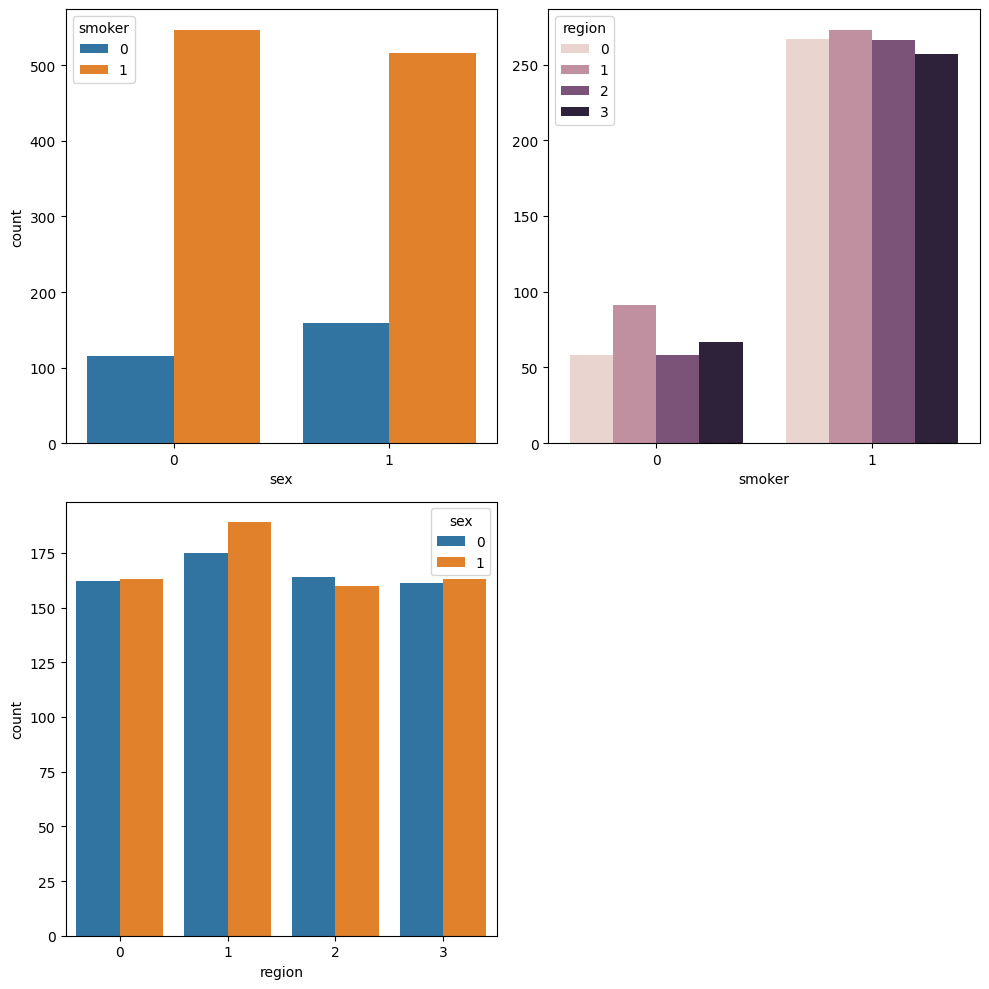

In [81]:

fig, axis = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(ax = axis[0, 0], data = df, x = "sex", hue = "smoker",)
sns.countplot(ax = axis[0, 1], data = df, x = "smoker", hue = "region").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "region", hue = "sex")

fig.delaxes(axis[1, 1])
plt.tight_layout()
plt.show()

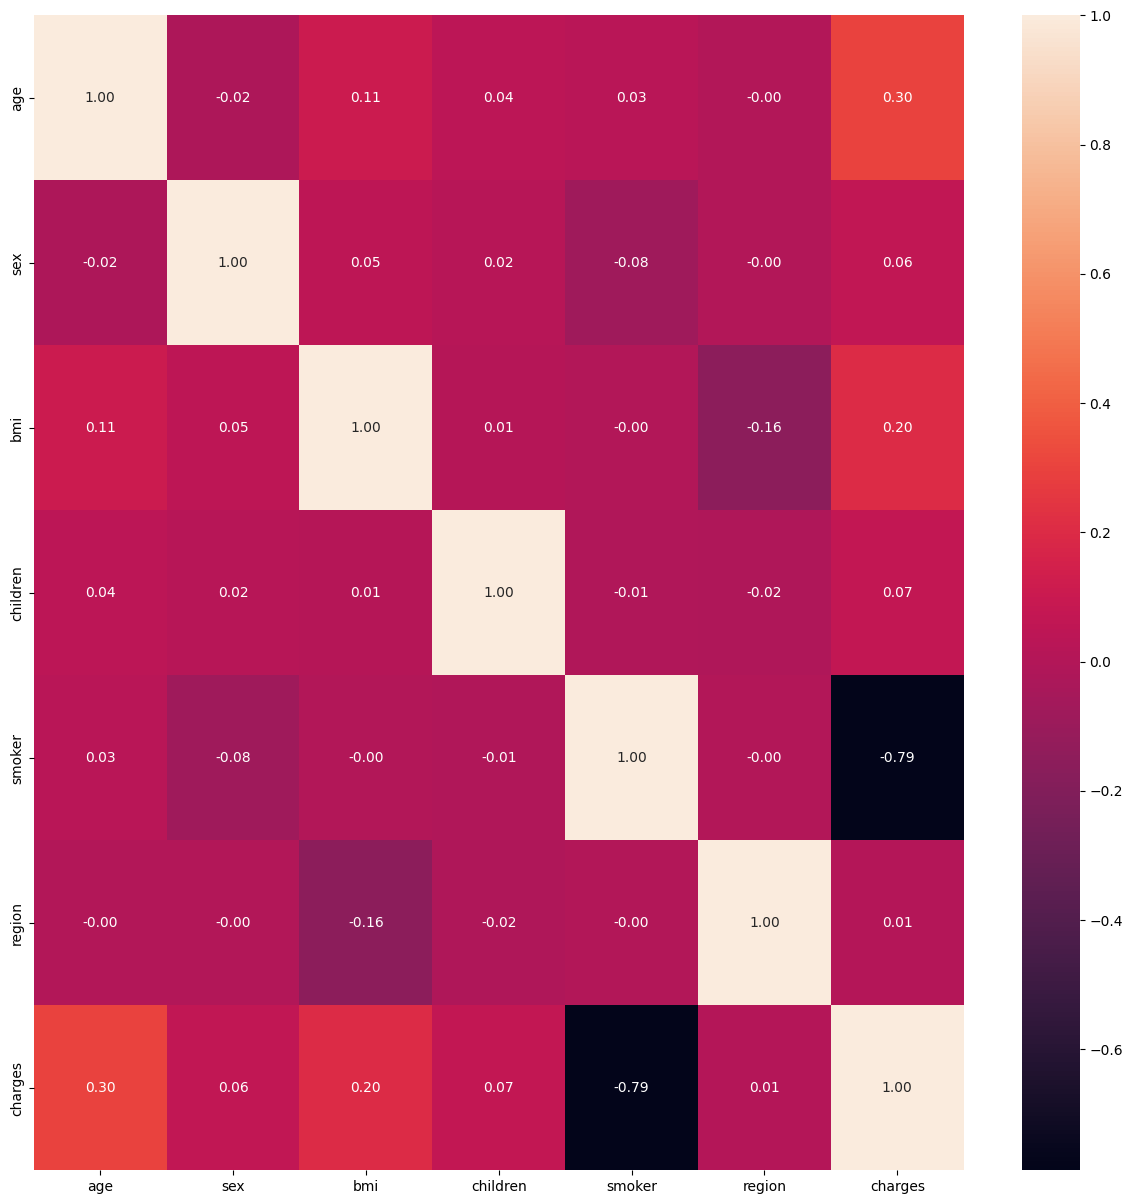

In [82]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

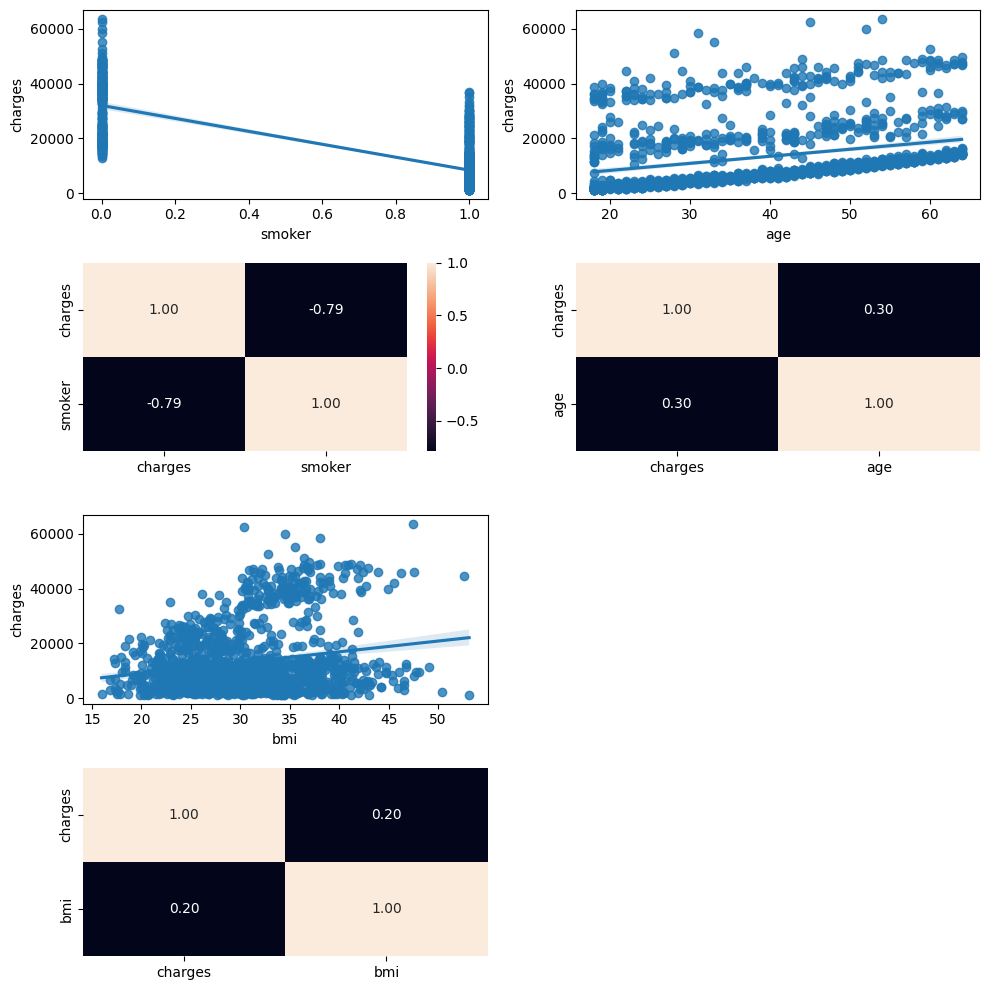

In [98]:
fig, axis = plt.subplots(4,2,figsize=(10,10))

sns.regplot(ax=axis[0,0], data=df, x="smoker", y="charges")
sns.heatmap(df[['charges','smoker']].corr(),annot=True,fmt='.2f',ax=axis[1,0])

sns.regplot(ax=axis[0,1], data=df, x="age", y="charges")
sns.heatmap(df[['charges','age']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="bmi", y="charges")
sns.heatmap(df[['charges','bmi']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)
fig.delaxes(axis[2,1])
fig.delaxes(axis[3,1])
plt.tight_layout()
plt.show()

Análisis:

Mejores Variables Predictoras: 

    Ya que se utilizará un Algórtimo de Regresión Líneal en este ejercicio, buscamos variables con una relación líneal directa con la variable objetivo.

    Tras realizar el EDA se eligen que las variables con mayor correlación con la variabre objetivo son: 'age', 'bmi' y 'smoker' 





Linealidad: Las variables seleccionadas tienen una relación lineal con el objetivo ('charges'), se observa en el Análisis anterior.

Independencia: 

Homoscedasticidad:

Normalidad de los Errores:

Ausencia de multicolinealidad: Las correlaciones entre las variables predictoras son muy bajas o nular, se aprecia en los gráficos multivariantes hechos en el EDA








EDA

Linealidad: La variable objetivo y la(s) predictora(s) tienen una relación lineal.
Independencia: Las observaciones son independientes unas de otras.
Homoscedasticidad: La varianza de los errores (es decir, las diferencias entre las predicciones del modelo y los datos reales) es constante en todos los niveles de las variables independientes.
Normalidad de los errores: Los errores están normalmente distribuidos. Esto es importante para la realización de pruebas estadísticas y para construir intervalos de confianza.
Ausencia de multicolinealidad: En una regresión múltiple, las variables independientes no están perfectamente correlacionadas entre sí. Si hay correlación perfecta, se dice que los datos tienen multicolinealidad (hay variables que son iguales) y dificulta el cálculo de los coeficientes.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 83.6 KB


In [54]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,668.000000
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,386.102966
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,334.000000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,668.000000
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,1002.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,1336.000000


<Axes: >

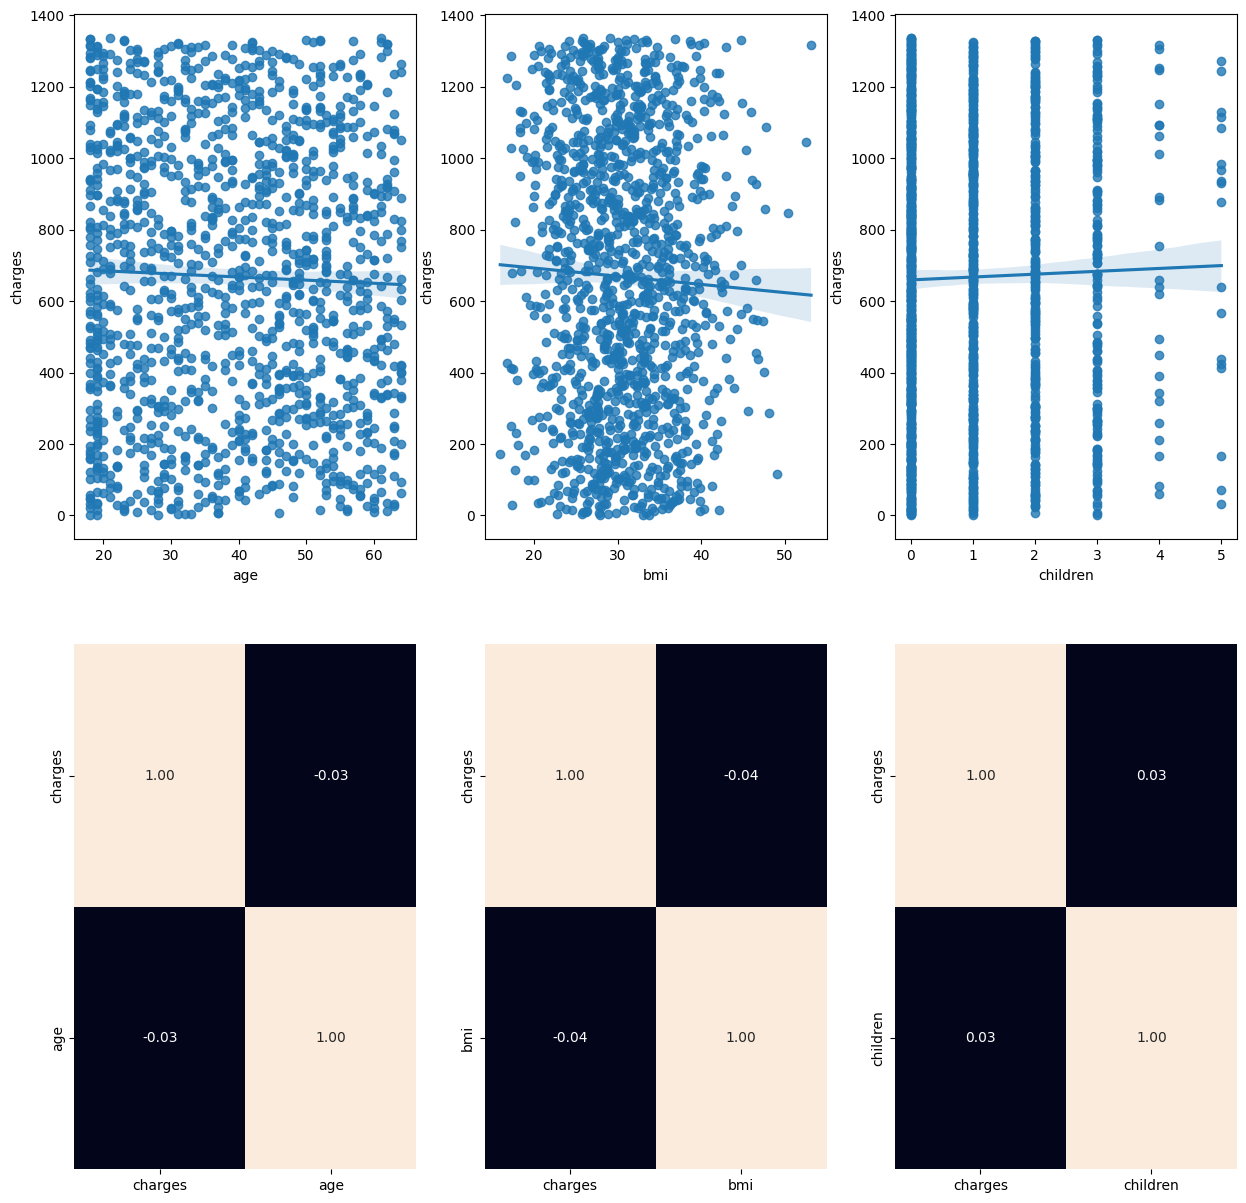

In [55]:
fig, axis = plt.subplots(2,3,figsize=(15,15))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "children", y = "charges")
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)


Despues del EDA

In [56]:
df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]
df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,0,27.900,0,0,0,0,0,0,0
1,18,1,33.770,1,1,1,1,1,1,1
2,28,1,33.000,3,1,1,2,1,1,1
3,33,1,22.705,0,1,2,3,1,1,2
4,32,1,28.880,0,1,2,4,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,1332,1,1,2
1334,18,0,31.920,0,1,3,1333,0,1,3
1335,18,0,36.850,0,1,1,1334,0,1,1
1336,21,0,25.800,0,1,0,1335,0,1,0


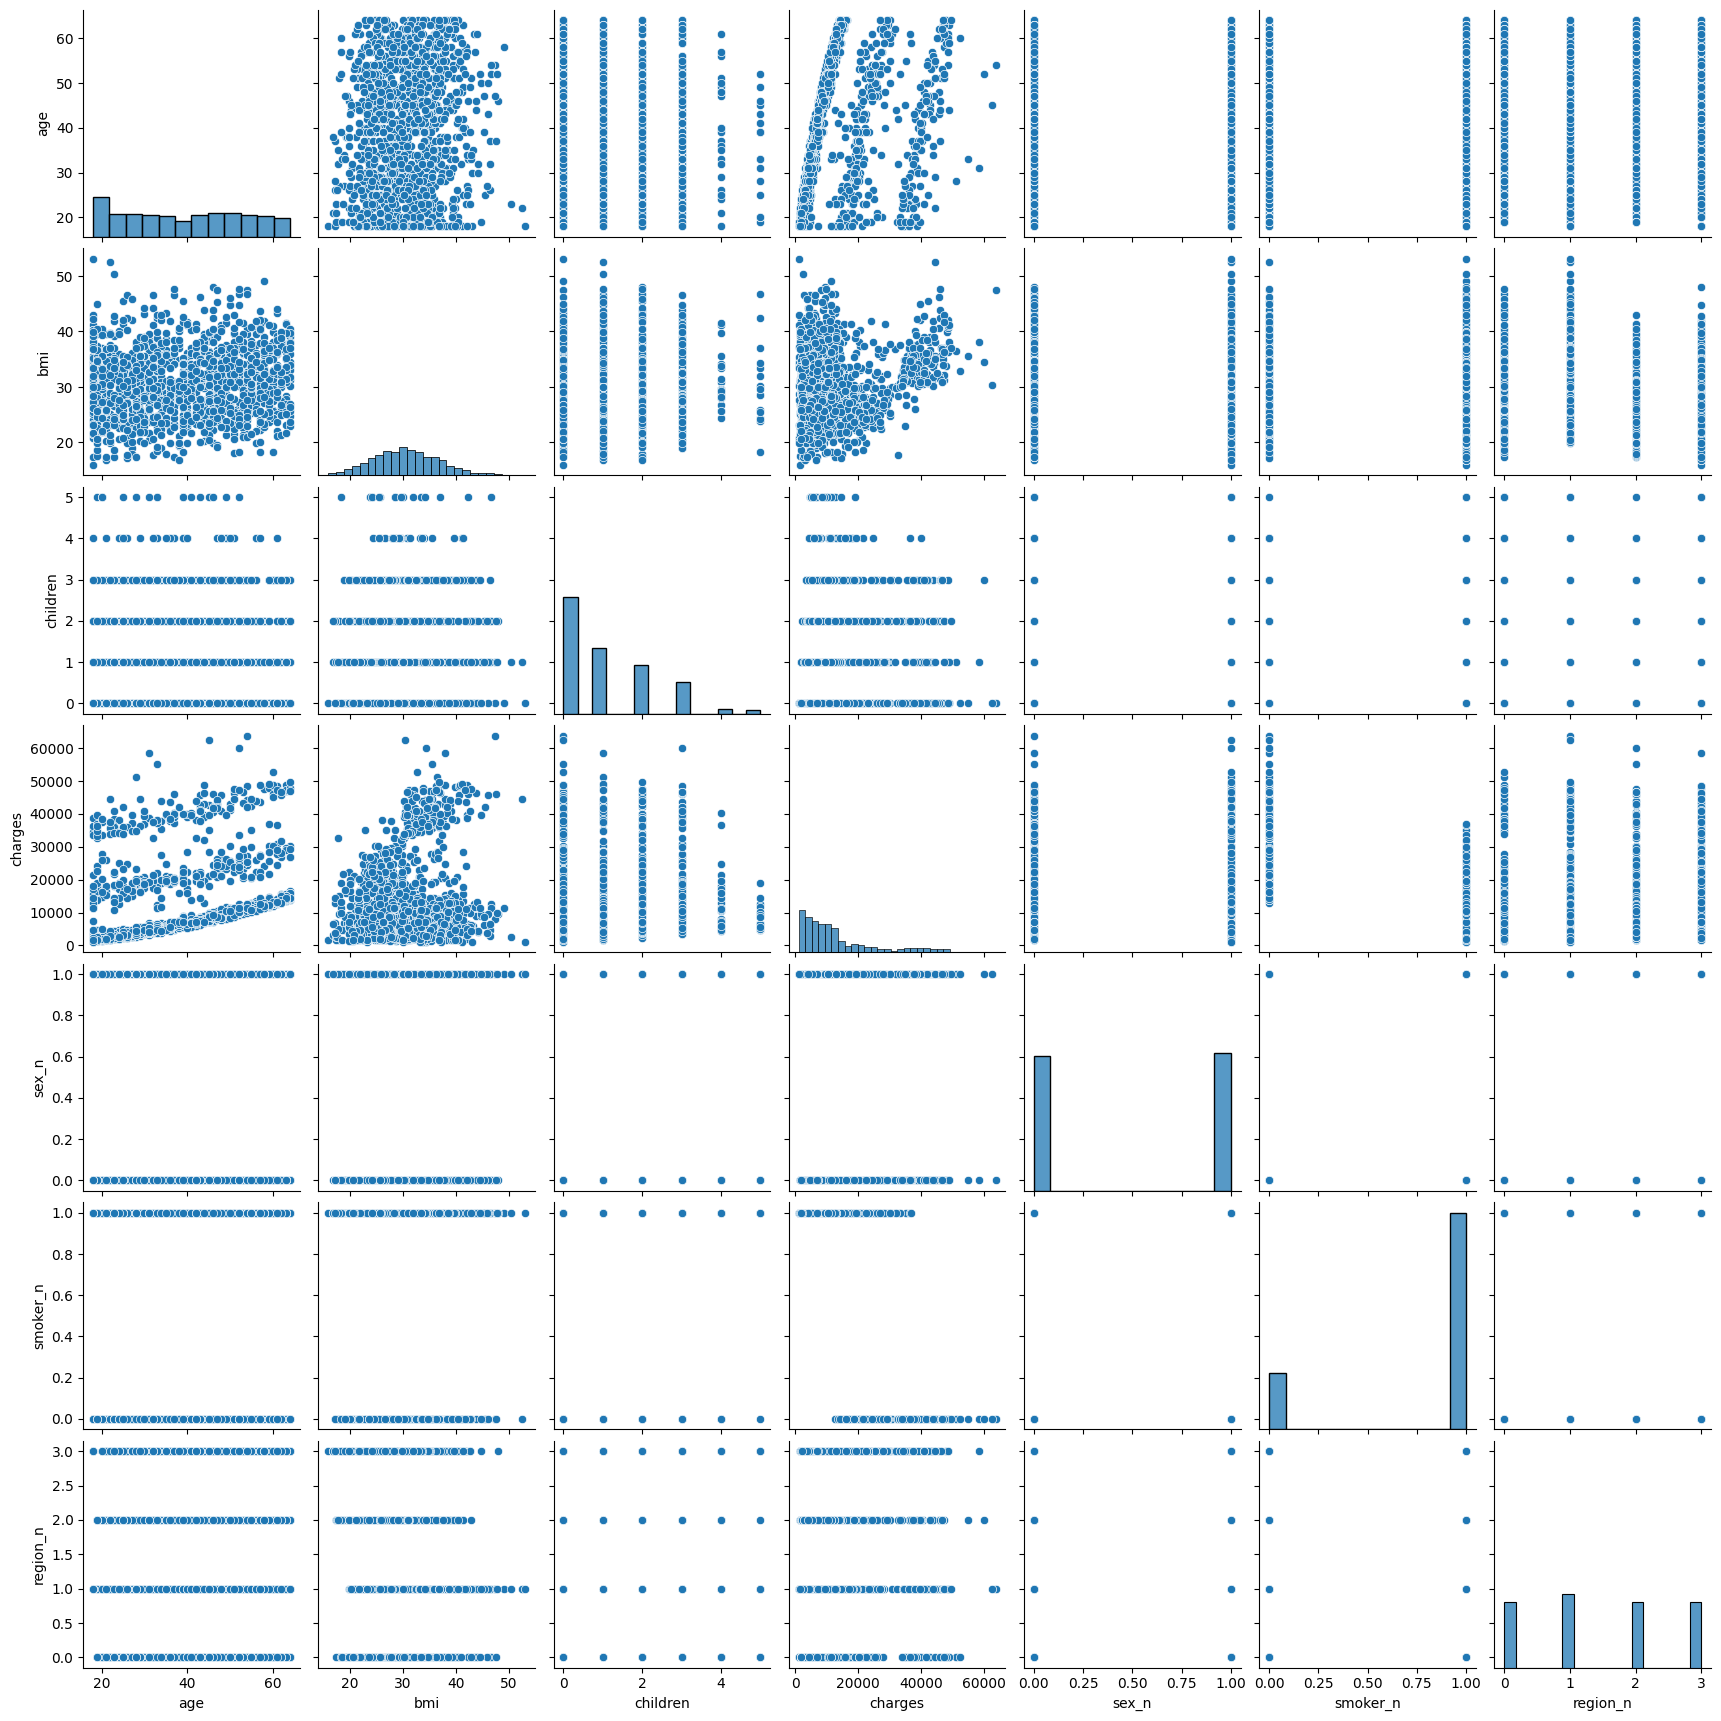

In [7]:
sns.pairplot(df)

In [57]:
df_final = df[['sex_n','age', 'bmi', 'children', 'smoker_n', 'region_n', 'charges']]
df_final.head()

,sex_n,age,bmi,children,smoker_n,region_n,charges
0,0,19,27.900,0,0,0,0
1,1,18,33.770,1,1,1,1
2,1,28,33.000,3,1,1,2
3,1,33,22.705,0,1,2,3
4,1,32,28.880,0,1,2,4


In [59]:
from sklearn.model_selection import train_test_split

X= df_final.drop(['charges'], axis=1)
y= df_final['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.4,random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
print(f'los coheficientes del modelo es: {model.coef_}')
print(f'el intercepto del modelo es: {model.intercept_}')

los coheficientes del modelo es: [-17.18814564  -1.22798694   0.34861855  17.7071062  -12.35860425
   6.51404867]
el intercepto del modelo es: 706.6990951319675


In [62]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'El MSE es: {mean_squared_error(y_pred,y_test)}')
print(f'El R2 es: {r2_score(y_pred,y_test)}')

El MSE es: 150962.58484596407
El R2 es: -176.92995871778444


In [64]:
df_final_2 = df_final.drop(['sex_n','region_n'],axis=1)
X = df_final_2.drop(['charges'], axis=1)
y = df_final_2['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model2 = LinearRegression()
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)

print(f'El intercepto es: {model2.intercept_}')
print(f'Los coheficientes es: {model2.coef_}')

print(f'El MSE es: {mean_squared_error(y_pred2,y_test)}')
print(f'El R2 es: {r2_score(y_pred2,y_test)}')


El intercepto es: 755.2951235948929
Los coheficientes es: [ -1.27453789  -1.03108259   6.9273099  -12.79039495]
El MSE es: 144189.32383104443
El R2 es: -303.25710010896205
